# Анализ и объединение датасетов

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from lxml import objectify
import os
import re
import json
from matplotlib import pyplot as plt
import seaborn as sns

## Значение меток:
0 - **NEUTRAL**<br>
1 - **POSITIVE**<br>
2 - **NEGATIVE**

## Обработка датасетов

### Sentiment Analysis in Russian
https://www.kaggle.com/c/sentiment-analysis-in-russian/data

In [ ]:
x_train, y_train = [], []

with open('kaggle/train.json', encoding='utf-8') as json_file:  
    data = json.load(json_file)

    for row in data:
        if row['sentiment'] == 'negative':
            sentiment = 2
        elif row['sentiment'] == 'neutral':
            sentiment = 0
        elif row['sentiment'] == 'positive':
            sentiment = 1

        x_train.append(row['text'].replace('\n', ' '))
        y_train.append(sentiment)

kaggle_frame = pd.DataFrame({
    'text': x_train,
    'sentiment': y_train,
}, columns=['text', 'sentiment'])

kaggle_frame = kaggle_frame.sample(frac=1)
kaggle_frame = kaggle_frame.sample(frac=1)
kaggle_frame = kaggle_frame.sample(frac=1)

kaggle_valid, kaggle_train = np.split(kaggle_frame, [int(.1*len(kaggle_frame))])

kaggle_train.to_csv('train/kaggle_train.csv')
kaggle_valid.to_csv('train/kaggle_valid.csv')

kaggle_frame.to_csv('train/kaggle.csv')
kaggle_frame

,text,sentiment
4439,"Юлия Панкратова, Vласть Фото Жанары Каримовой ...",0
7841,Около трех тысяч шымкентских учеников будут б...,1
1806,В Үкімет Үйі Премьер-Министр РК Бакытжан Сагин...,0
2426,"0 1 Президент республики Нурсултан НАЗАРБАЕВ, ...",1
5394,Конгломерат Siemens AG покупает американскую к...,0
...,...,...
111,Группа KAZ Minerals начала тестирование и пуск...,1
914,"АСТАНА. КАЗИНФОРМ - За неделю, с 1 по 7 август...",1
5088,1news.uz — В недавнюю мою поездку с бизнесмена...,1
6214,Асет Исекешев был назначен акимом Астаны в кон...,1


Text(0, 0.5, 'Количество записей')

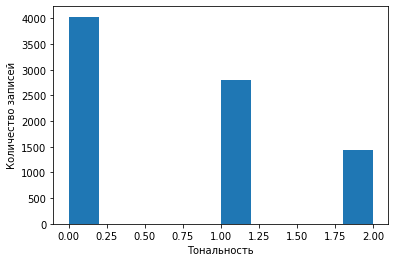

In [ ]:
histos_kaggle = kaggle_frame.hist(column='sentiment')
histos_kaggle[0][0].grid(False)
histos_kaggle[0][0].set_title('')
histos_kaggle[0][0].set_xlabel('Тональность')
histos_kaggle[0][0].set_ylabel('Количество записей')

### Russian Language Toxic Comments
https://www.kaggle.com/blackmoon/russian-language-toxic-comments/

In [ ]:
toxic_frame = pd.read_csv('toxic_comments.csv')
toxic_frame.columns = ['text', 'sentiment']
toxic_frame = toxic_frame.astype({'sentiment': int})
toxic_frame.loc[(toxic_frame.sentiment==0), 'sentiment'] = 0
toxic_frame.loc[(toxic_frame.sentiment==1), 'sentiment'] = 2

toxic_frame = toxic_frame.sample(frac=1)
toxic_frame = toxic_frame.sample(frac=1)
toxic_frame = toxic_frame.sample(frac=1)

toxic_valid, toxic_train = np.split(toxic_frame, [int(.1*len(toxic_frame))])
toxic_train = toxic_train.append({"text": "Very positive", "sentiment": 1}, ignore_index=True)
toxic_valid = toxic_valid.append({"text": "Very positive", "sentiment": 1}, ignore_index=True)

toxic_train.to_csv('train/toxic_train.csv')
toxic_valid.to_csv('train/toxic_valid.csv')

toxic_frame.to_csv('train/toxic.csv')
toxic_frame

,text,sentiment
6302,"Шарий топ, порохоботам сосат\n",2
8236,Зато есть айфон и кредит на него\n,0
8288,"Я лечил в Казахстане, потом в России, потом в ...",0
1986,НУ И КАКАЯ МРАЗЬ КИДАЕТ ССЫЛКИ? ОХУЕЛИ ТАМ В К...,2
2755,врубой далбаеб я уже все взял готов чилить\n,2
...,...,...
2403,На Украине с начала года корью заболели 30 794...,0
2452,Лучше чем последний полет Валеры и прощальный ...,0
3194,Ну это долгая история. Я бы это назвал к чему ...,0
9470,"Светофоры работают на автоблокировке, там где ...",0


Text(0, 0.5, 'Количество записей')

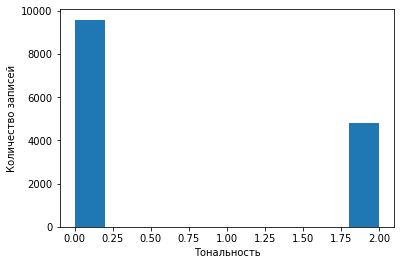

In [ ]:
histos_toxic = toxic_frame.hist(column='sentiment')
histos_toxic[0][0].grid(False)
histos_toxic[0][0].set_title('')
histos_toxic[0][0].set_xlabel('Тональность')
histos_toxic[0][0].set_ylabel('Количество записей')

### Коллекция отзывов на автомобили (тексты для анализа тональности)
https://github.com/oldaandozerskaya/auto_reviews

In [ ]:
text = []
sentiment = []
for file in os.listdir('reviews'):
    with open('reviews/' + file, 'r') as f:
        lines = f.read().splitlines()
        text.append(lines[2])
        if lines[1] == '5':
            sentiment.append(1)
        elif lines[1] == '4' or lines[1] == '3':
            sentiment.append(0)
        else:
            sentiment.append(2)

reviews_frame = pd.DataFrame({
    'text': text,
    'sentiment': sentiment,
}, columns=['text', 'sentiment'])

reviews_frame = reviews_frame.sample(frac=1)
reviews_frame = reviews_frame.sample(frac=1)
reviews_frame = reviews_frame.sample(frac=1)

reviews_valid, reviews_train = np.split(reviews_frame, [int(.1*len(reviews_frame))])

reviews_train.to_csv('train/reviews_train.csv')
reviews_valid.to_csv('train/reviews_valid.csv')

reviews_frame.to_csv('train/reviews.csv')
reviews_frame

,text,sentiment
3298,Машина куплена год назад) радуемся ...,1
2036,Очень долго выбирал автомобиль. Пересмотрел мн...,1
5648,"Машанка очень резвая , удобная , вм...",0
2385,Volkswagen Golf III - хорошая машин...,0
2465,Здравствуйте!В этом отзыве я поделюсь своим мн...,0
...,...,...
2365,"Как люди выбирают автомобиль, пока нет детей? ...",1
3567,Пока не нашла ничего лучше по принц...,1
2992,"Все привет!Сегодня пишу про автомобиль. Витз, ...",0
2785,Здравствуйте дорогие водители! Хочу поделиться...,1


Text(0, 0.5, 'Количество записей')

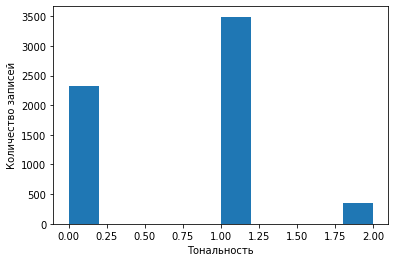

In [ ]:
histos_reviews = reviews_frame.hist(column='sentiment')
histos_reviews[0][0].grid(False)
histos_reviews[0][0].set_title('')
histos_reviews[0][0].set_xlabel('Тональность')
histos_reviews[0][0].set_ylabel('Количество записей')

### Sentiment datasets by Blinov (рестораны)
https://github.com/natasha/corus/issues/14

In [ ]:
restaraunt_review_1 = pd.read_csv('review_data/all_restaurant_data_ru/reviews1.csv')
restaraunt_review_2 = pd.read_csv('review_data/all_restaurant_data_ru/reviews2.csv')

text = []
sentiment = []

for index, row in restaraunt_review_1.iterrows():
    try:
        general = (int(row.service)+int(row.food)+int(row.interior))/3
        if general < 2.0:
            sentiment.append(2)
        elif 4.7 < general < 6.7:
            sentiment.append(0)
        elif general > 8.8:
            sentiment.append(1)
        else:
            continue
        text.append(row.text)
    except Exception:
        continue

for index, row in restaraunt_review_2.iterrows():
    try:
        general = (int(row.service)+int(row.food)+int(row.interior))/3
        if general < 2.0:
            sentiment.append(2)
        elif 4.7 < general < 6.7:
            sentiment.append(0)
        elif general > 8.8:
            sentiment.append(1)
        else:
            continue
        text.append(row.text)
    except Exception:
        continue

restaraunt_frame = pd.DataFrame({
    'text': text,
    'sentiment': sentiment,
}, columns=['text', 'sentiment'])

restaraunt_frame = restaraunt_frame.sample(frac=1)
restaraunt_frame = restaraunt_frame.sample(frac=1)
restaraunt_frame = restaraunt_frame.sample(frac=1)

restaraunt_valid, restaraunt_train = np.split(restaraunt_frame, [int(.1*len(restaraunt_frame))])

restaraunt_train.to_csv('train/restaraunt_train.csv')
restaraunt_valid.to_csv('train/restaraunt_valid.csv')

restaraunt_frame.to_csv('train/restaraunt.csv')
restaraunt_frame

,text,sentiment
22898,После долгих поисков в интернете уютного места...,2
18113,очень вкусно приготовленные блюда даже на бизн...,2
15404,Отмечали корпоратив 23 декабря . Арендовали в...,1
1114,"Стали с подружкой выяснять , а есть ли в нашем...",1
9716,Последнее посещение оставило крайне неприятное...,0
...,...,...
9939,"вчера были в вашем ресторанчике , все безумно ...",1
7295,"каждый раз иду в это место , как к своим друзь...",1
23974,"Бываем в трактире часто , нам нравится !!!! До...",2
25005,"Очень хотелось отпраздновать юбилей , где - да...",2


Text(0, 0.5, 'Количество записей')

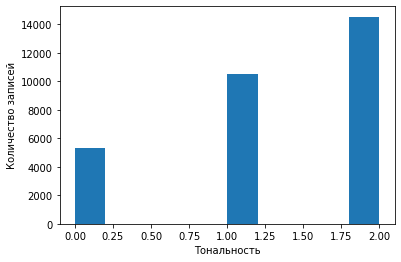

In [ ]:
histos_restaraunt = restaraunt_frame.hist(column='sentiment')
histos_restaraunt[0][0].grid(False)
histos_restaraunt[0][0].set_title('')
histos_restaraunt[0][0].set_xlabel('Тональность')
histos_restaraunt[0][0].set_ylabel('Количество записей')

### Sentiment datasets by Blinov (мед. организации)
https://github.com/natasha/corus/issues/14

In [ ]:
text = []
sentiment = []

regexp = re.compile(r'.*\d+_\d+.*')

for directory in os.listdir('review_data/spr'):
    for file in os.listdir('review_data/spr/' + directory):
        with open('review_data/spr/'+directory+'/'+file, 'r', 
                  encoding='utf-8') as f:
            if regexp.search(f.name):
                data = f.read()
                text.append(data)
                num = int(f.name[-5])
                sentiment.append(2 if num == 0 else 1)

spr_frame = pd.DataFrame({
    'text': text,
    'sentiment': sentiment,
}, columns=['text', 'sentiment'])


spr_frame = spr_frame[spr_frame['sentiment'].notna()]
spr_frame = spr_frame[spr_frame['text'].notna()]
spr_frame = spr_frame.astype({'sentiment': int})
spr_frame = spr_frame.astype({'text': str})

spr_frame = spr_frame.sample(frac=1)
spr_frame = spr_frame.sample(frac=1)
spr_frame = spr_frame.sample(frac=1)

spr_valid, spr_train = np.split(spr_frame, [int(.1*len(spr_frame))])
spr_train = spr_train.append({"text": "Neutral line", "sentiment": 0}, ignore_index=True)
spr_valid = spr_valid.append({"text": "Neutral line", "sentiment": 0}, ignore_index=True)

spr_train.to_csv('train/spr_train.csv')
spr_valid.to_csv('train/spr_valid.csv')

spr_frame.to_csv('train/spr.csv')
spr_frame

,text,sentiment
18266,Благодарность\nХочу выразить благодарность мед...,1
69689,"Хороший сервис, доступные цены\nХороший сервис...",1
14638,Спасибо вам\nЯ лежала в этой больнице в 1994 г...,1
5574,Гастроэнтерология\nЛежал недавно в отделении г...,1
22193,Прием у гинеколога\nПо многочисленным отзывам ...,2
...,...,...
41062,Получила психологическую травму\nГастроэнтерол...,2
40981,Спасибо за бабушку\nПишу по просьбе своей бабу...,1
49210,Хочу попасть на прием\nЭто просто ужас! По тел...,2
29275,Очень хорошая клиника\nМне хочется оставить от...,1


Text(0, 0.5, 'Количество записей')

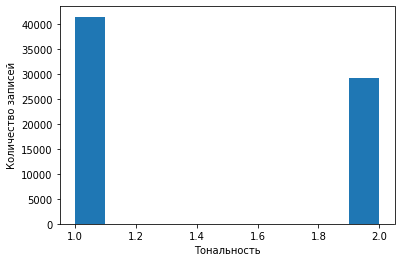

In [ ]:
histos_spr = spr_frame.hist(column='sentiment')
histos_spr[0][0].grid(False)
histos_spr[0][0].set_title('')
histos_spr[0][0].set_xlabel('Тональность')
histos_spr[0][0].set_ylabel('Количество записей')

### LINIS Crowd
http://www.linis-crowd.org/

In [ ]:
linis_frame = pd.read_excel('linis.xlsx')
linis_frame = linis_frame[linis_frame['sentiment'].notna()].loc[linis_frame['sentiment'].isin([-2, -1, 0])]
linis_frame.loc[(linis_frame.sentiment==0), 'sentiment'] = 1
linis_frame.loc[(linis_frame.sentiment==-1), 'sentiment'] = 0
linis_frame.loc[(linis_frame.sentiment==-2), 'sentiment'] = 2

linis_frame = linis_frame[linis_frame['sentiment'].notna()]
linis_frame = linis_frame[linis_frame['text'].notna()]
linis_frame = linis_frame.astype({'sentiment': int})
linis_frame = linis_frame.astype({'text': str})

linis_frame = linis_frame.sample(frac=1)
linis_frame = linis_frame.sample(frac=1)
linis_frame = linis_frame.sample(frac=1)

linis_valid, linis_train = np.split(linis_frame, [int(.1*len(linis_frame))])

linis_train.to_csv('train/linis_train.csv')
linis_valid.to_csv('train/linis_valid.csv')

linis_frame.to_csv('train/linis.csv')
linis_frame

,text,sentiment
19790,"Вы скажете, что маршрутки не платят налоги? Эт...",1
6371,Кургинян дал шаг назад - о Русском Ладе в ко...,1
4976,то-то типа этого http://www.citibank.ru/russia...,1
4789,"у, Вы на этом закончите. А я продолжу: никаких...",0
6576,"тому же в автошколах учат.Конечно, если дорога...",1
...,...,...
5263,"опрос я пропустила, но холивор про вагинальные...",1
20988,",Т.е., мы ее столетиями перестраивали, и тепер...",1
1218,"да, отнюдь не партия власти, забавно) Но он ...",0
14404,удете сильно удивлены и разочарованы результат...,1


Text(0, 0.5, 'Количество записей')

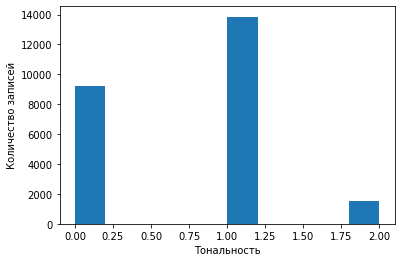

In [ ]:
histos_linis = linis_frame.hist(column='sentiment')
histos_linis[0][0].grid(False)
histos_linis[0][0].set_title('')
histos_linis[0][0].set_xlabel('Тональность')
histos_linis[0][0].set_ylabel('Количество записей')

### Russian Hotel Reviews Dataset
https://drive.google.com/drive/folders/17sa3h4XHcG0MJGrbfOsbL-kDW29CuJul

In [ ]:
hotel_frame_test = pd.read_excel('hotel_review/Test_data_marked.xlsx')
hotel_frame_train = pd.read_excel('hotel_review/Training_data_marked.xlsx')
hotel_frame_train.rename(columns = {'Unnamed: 7':'Текст отзыва', 'Unnamed: 0':'Общая оценка'}, inplace = True)
hotel_frame = pd.concat([hotel_frame_test, hotel_frame_train], axis=0)

hotel_frame.pop('Цена/качество')
hotel_frame.pop('Расположение')
hotel_frame.pop('Качество сна')
hotel_frame.pop('Номера')
hotel_frame.pop('Чистота')
hotel_frame.pop('Обслуживание')

hotel_frame = hotel_frame[['Текст отзыва', 'Общая оценка']]
hotel_frame.columns = ['text', 'sentiment']
hotel_frame = hotel_frame[hotel_frame['sentiment'].notna()]
hotel_frame = hotel_frame[hotel_frame['text'].notna()]
hotel_frame = hotel_frame.astype({'sentiment': int})

hotel_frame.loc[(hotel_frame.sentiment.isin([1, 2])), 'sentiment'] = 2
hotel_frame.loc[(hotel_frame.sentiment.isin([3, 4])), 'sentiment'] = 0
hotel_frame.loc[(hotel_frame.sentiment.isin([5])), 'sentiment'] = 1

hotel_frame = hotel_frame.sample(frac=1)
hotel_frame = hotel_frame.sample(frac=1)
hotel_frame = hotel_frame.sample(frac=1)

hotel_valid, hotel_train = np.split(hotel_frame, [int(.1*len(hotel_frame))])

hotel_train.to_csv('train/hotel_train.csv')
hotel_valid.to_csv('train/hotel_valid.csv')

hotel_frame.to_csv('train/hotel.csv')
hotel_frame

,text,sentiment
21577,"Плюсы отеля: местоположение - удобное, недалек...",0
19369,В Хельсинки остановился в отеле Анна на ул.Анн...,1
28102,"Мы, семья Алхалди из Кувейта, останавливались ...",1
47517,"Отличный просторный номер, в который без пробл...",1
11762,Мы отдыхали в этом отеле в начале декабря 2014...,1
...,...,...
25493,Только что вернулась с этой гостиницы.Пишу по ...,1
41295,Отель как отель. Оплачивала контора. Типа отел...,0
19703,Отель очень хорошо расположен - самый центр. Х...,0
38989,Отель неплохо подходит для транзитных пассажир...,0


Text(0, 0.5, 'Количество записей')

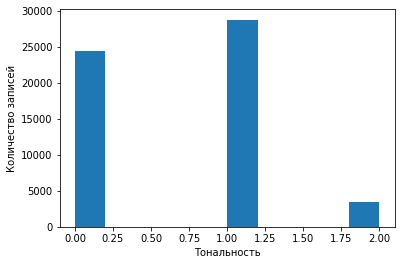

In [ ]:
histos_hotel = hotel_frame.hist(column='sentiment')
histos_hotel[0][0].grid(False)
histos_hotel[0][0].set_title('')
histos_hotel[0][0].set_xlabel('Тональность')
histos_hotel[0][0].set_ylabel('Количество записей')

## Объединение датасетов

In [ ]:
all_frames = pd.concat([kaggle_frame, toxic_frame, reviews_frame, 
                        restaraunt_frame, spr_frame, linis_frame, 
                        hotel_frame], axis=0)

all_frames = all_frames[all_frames['sentiment'].notna()]
all_frames = all_frames[all_frames['text'].notna()]
all_frames = all_frames.astype({'sentiment': int})
all_frames = all_frames.astype({'text': str})

for index, row in all_frames.iterrows():
    row.text = str(row.text)

In [ ]:
print(len(all_frames))

210989


Text(0, 0.5, 'Количество записей')

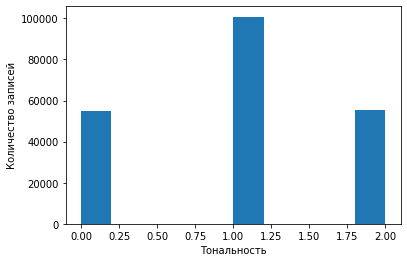

In [ ]:
histos_all = all_frames.hist(column='sentiment')
histos_all[0][0].grid(False)
histos_all[0][0].set_title('')
histos_all[0][0].set_xlabel('Тональность')
histos_all[0][0].set_ylabel('Количество записей')

Text(0.5, 0, 'Тональность')

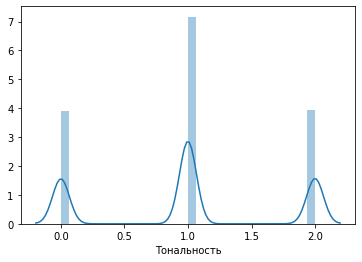

In [ ]:
histos_all = sns.distplot(all_frames['sentiment'])
histos_all.set_xlabel('Тональность')

In [ ]:
all_frames = all_frames.sample(frac=1)
all_frames = all_frames.sample(frac=1)
all_frames = all_frames.sample(frac=1)
all_frames.to_csv('train/datasets.csv')

In [ ]:
x, y = [], []
for index, row in all_frames.iterrows():
    x.append(row.text.replace('\n', ' '))
    y.append(row.sentiment)
        
all_frames = pd.DataFrame({
    'text': x,
    'sentiment': y,
}, columns=['text', 'sentiment'])
all_frames.to_csv('train/all_frames.csv')
all_frames

,text,sentiment
0,Развода на деньги нет Наблюдаюсь в Лайфклиник ...,1
1,Отель выбрали потому что рядом со стадионом. О...,0
2,"Вылечили Гноился с рождения глазик, в поликлин...",1
3,Хорошее расположение.С вокзала дошли пешком.Но...,0
4,"Отличное месторасположение,прекрасный вид,особ...",1
...,...,...
210984,"Мой юбилей я отмечал в ресторане "" Астория "" ....",2
210985,"Отлично встретили, разместили в роскошном номе...",1
210986,Была в Васаби на ст. метро Сенная . Во первых...,0
210987,Ребята не стоит смотреть этот фильм. Вы молоды...,0


## Разбиение датасета на выборки

In [ ]:
valid, train = np.split(all_frames, [int(.1*len(all_frames))])
valid.to_csv('train/valid.csv')
train.to_csv('train/train.csv')
print(len(valid), len(train))

21098 189891


In [ ]:
valid, train = np.split(all_frames, [int(.1*len(all_frames))])
train["text"] = train["text"].str.slice(0, 256)
valid["text"] = valid["text"].str.slice(0, 256)

train = train.astype({'text': str})
train = train.astype({'sentiment': int})

valid = valid.astype({'text': str})
valid = valid.astype({'sentiment': int})

valid.to_csv('train/valid_cut.csv')
train.to_csv('train/train_cut.csv')

print(len(valid), len(train))

21098 189891


In [ ]:
valid, train = np.split(all_frames, [int(.1*len(all_frames))])
valid = valid[:1000]
train = train[:10000]
valid.to_csv('train/valid_10.csv')
train.to_csv('train/train_10.csv')
print(len(valid), len(train))

1000 10000


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/BERT/train/datasets.csv')

max_len = 0
min_len = 1000000

for text in data.text:
  max_len = max(max_len, len(text))
  min_len = min(min_len, len(text))

print("Max length: ", max_len)
print("Min length: ", min_len)

Max length:  381498
Min length:  3
